In [1]:
import json

import pandas as pd
from matplotlib import pyplot as plt

from tqdm import tqdm
from transformers import AutoTokenizer

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
import pandas as pd
import matplotlib

In [2]:
!pip install transformers==4.27.1
!git clone https://github.com/KLUE-benchmark/KLUE.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 16.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2
Cloning into 'KLUE'...
remote: Enumerating objects: 157, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 157 (delta 18), reused 9 (delta 9), pack-reused 133
Receiving objects: 100% (157/157), 49.11 MiB | 12.95 MiB/s, done.
Resolving deltas: 100% (43/43), done.
Updating files: 100% (29/29), done.


In [4]:
import json

import pandas as pd
from matplotlib import pyplot as plt

from tqdm import tqdm
from transformers import AutoTokenizer

In [32]:
train_df = pd.read_csv('../data/train.csv')
valid_df = pd.read_csv('../data/dev.csv')
test_df = pd.read_csv('../data/test.csv')

In [43]:
train_df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


In [48]:
# 입력의 두 문장을 토크나이징하여 길이와 unk 토큰의 개수를 분석합니다
def tokenizing(df):
    tokenizer = AutoTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")

    sentence1_len = []
    sentence2_len = []
    sentence1_unk = []
    sentence2_unk = []
    for i, item in df.iterrows():
        sentence1 = tokenizer(item['sentence_1'])['input_ids']
        sentence2 = tokenizer(item['sentence_2'])['input_ids']

        sentence1_len.append(len(sentence1))
        sentence2_len.append(len(sentence2))

        sentence1_unk.append(sentence1.count(tokenizer.unk_token_id))
        sentence2_unk.append(sentence2.count(tokenizer.unk_token_id))

    tokenized_df = pd.DataFrame([sentence1_len, sentence2_len, sentence1_unk, sentence2_unk]).transpose()
    tokenized_df.columns = ['1_len', '2_len', '1_unk', '2_unk']
    print(tokenized_df.describe())

In [35]:
# label의 분포를 box plot으로 그립니다
def draw_box_plot(df):
    label_list = [row['label'] for i, row in df.iterrows()]

    plt.boxplot(label_list)
    plt.title("Boxplot for target label")
    plt.show()

In [45]:
# pandas 데이터를 가지고 그래프를 그리는 함수입니다
def draw_graph(df):
    source_binary = {source:[0, 0] for source in sorted(df['source'].unique())}
    print(source_binary)
    # for i, item in df.iterrows():
    #     source_binary[item['source']][item['binary_label']] += 1
    # source_binary_df = pd.DataFrame(source_binary).transpose()

    # # source의 분포
    # df['source'].value_counts().plot(kind='bar', rot=20, figsize=(8, 6))
    # plt.show()
    # # source별 binary label의 분포
    # source_binary_df.plot(kind='bar', rot=20, figsize=(8, 6))
    # plt.show()
    # # label의 분포
    # df['label'].plot(kind='hist', rot=20, figsize=(8, 6))
    # plt.show()
    # # binary label의 분포
    # df['binary_label'].value_counts().plot(kind='bar', rot=20, figsize=(8, 6))
    # plt.show()

In [37]:
# label과 binary label 통계 분석
print(train_df.describe())
print(valid_df.describe())

             label  binary-label
count  9324.000000   9324.000000
mean      1.849968      0.389532
std       1.602212      0.487670
min       0.000000      0.000000
25%       0.200000      0.000000
50%       1.600000      0.000000
75%       3.400000      1.000000
max       5.000000      1.000000
            label  binary-label
count  550.000000    550.000000
mean     2.584000      0.520000
std      1.459483      0.500055
min      0.000000      0.000000
25%      1.400000      0.000000
50%      2.600000      1.000000
75%      3.800000      1.000000
max      5.000000      1.000000


train


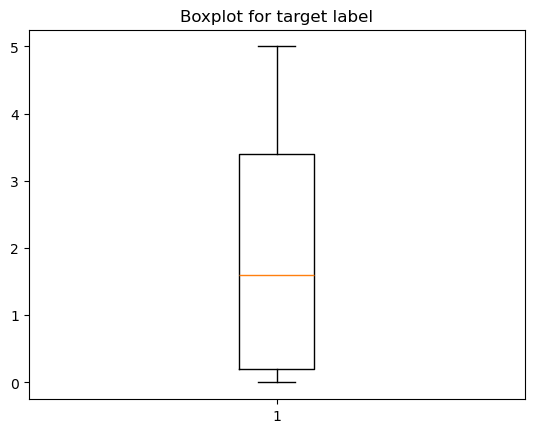

test


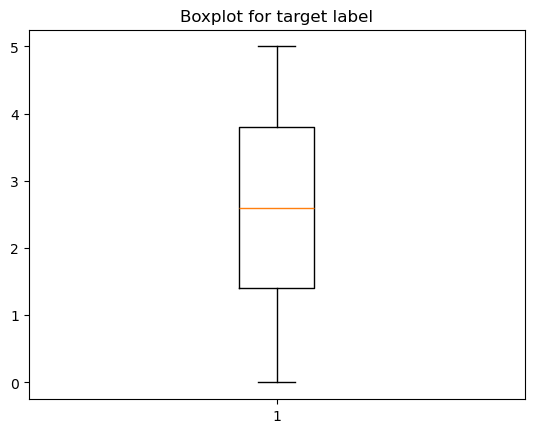

In [38]:
# label 분포 확인
print("train")
draw_box_plot(train_df)

print("test")
draw_box_plot(valid_df)

In [46]:
# 토크나이징 결과 분석
print("train")
tokenizing(train_df)

print("test")
tokenizing(valid_df)

train
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_231774/1235931795.py", line 3, in <module>
    tokenizing(train_df)
  File "/tmp/ipykernel_231774/2667229356.py", line 3, in tokenizing
    tokenizer = AutoTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")
  File "/opt/conda/lib/python3.10/site-packages/transformers/models/auto/tokenization_auto.py", line 786, in from_pretrained
  File "/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py", line 2024, in from_pretrained
    tokens = [token]
  File "/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py", line 2056, in _from_pretrained
    """
  File "/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py", line 2256, in _from_pretrained
    Will be passed to the underlying mod

In [47]:
draw_graph(train_df)

{'nsmc-rtt': [0, 0], 'nsmc-sampled': [0, 0], 'petition-rtt': [0, 0], 'petition-sampled': [0, 0], 'slack-rtt': [0, 0], 'slack-sampled': [0, 0]}


In [17]:
X.head()

,sentence_1,sentence_2
0,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요."
1,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다."
2,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.
3,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.
4,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!


In [19]:
y.head()

0    2.2
1    4.2
2    2.4
3    3.0
4    0.0
Name: label, dtype: float64

In [27]:
print('데이터 개수: ', len(train_df))
print('X_Null 개수: ', len(train_df[train_df['sentence_1'].isnull() | train_df['sentence_2'].isnull()]))
print('y_Null 개수: ', len(train_df[y.isnull()]))

데이터 개수:  9324
X_Null 개수:  0
y_Null 개수:  0
